In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
inspector = inspect(engine)
inspector.get_table_names()
# reflect the tables
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [15]:
column_measurement = inspector.get_columns('measurement')
for a in column_measurement:
    print(a["name"], a["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
column_station = inspector.get_columns('station')
for b in column_station:
    print(b["name"], b["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel = [measurement.date, measurement.prcp]
y_2017 = session.query(*sel).\
    filter(measurement.date > '2016-08-23').\
    group_by(measurement.date).\
    order_by(measurement.date).all()
df = pd.DataFrame(y_2017, columns=['Date', 'Percipitation'])
df.set_index('Date', inplace=True,)
df.head(10)

,Percipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


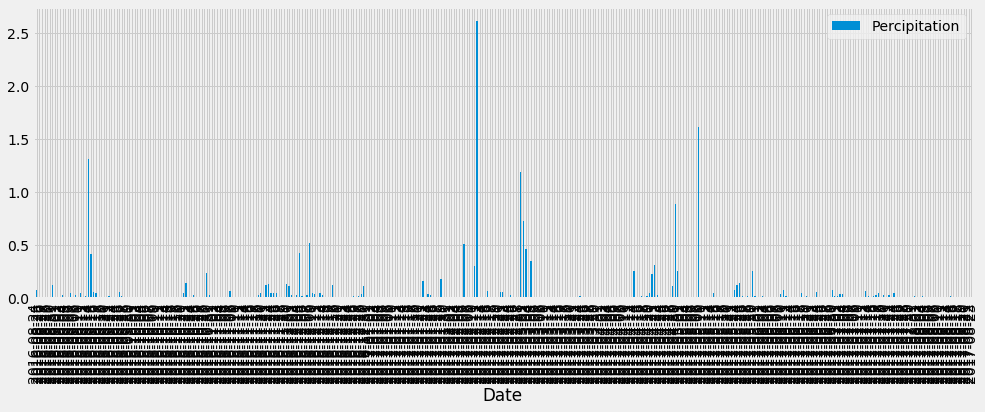

In [57]:
prcp_plot = df.plot(kind="bar", figsize=(15,5))

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['Percipitation'].describe()

count    363.000000
mean       0.048843
std        0.205197
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: Percipitation, dtype: float64

In [63]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()

[(9)]

In [77]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
USC00519281 = session.query(measurement).filter_by(station='USC00519281').count()
print(USC00519281)

2772


In [78]:
USC00519397 = session.query(measurement).filter_by(station='USC00519397').count()
print(USC00519397)

2724


In [79]:
USC00513117 = session.query(measurement).filter_by(station='USC00513117').count()
print(USC00513117)

2709


In [80]:
USC00519523 = session.query(measurement).filter_by(station='USC00519523').count()
print(USC00519523)

2669


In [81]:
USC00516128 = session.query(measurement).filter_by(station='USC00516128').count()
print(USC00516128)

2612


In [82]:
USC00514830 = session.query(measurement).filter_by(station='USC00514830').count()
print(USC00514830)

2202


In [83]:
USC00511918 = session.query(measurement).filter_by(station='USC00511918').count()
print(USC00511918)

1979


In [84]:
USC00517948 = session.query(measurement).filter_by(station='USC00517948').count()
print(USC00517948)

1372


In [85]:
USC00518838 = session.query(measurement).filter_by(station='USC00518838').count()
print(USC00518838)

511


In [92]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.max(measurement.tobs), 
       func.min(measurement.tobs), 
       func.avg(measurement.tobs)]
temps = session.query(*sel).filter_by(station = 'USC00519281').all()
temps

[(85.0, 54.0, 71.66378066378067)]

In [103]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [measurement.date, measurement.tobs]
max_station = session.query(*sel).\
    filter_by(station = 'USC00519281').\
    filter(measurement.date > '2016-08-23').\
    group_by(measurement.date).\
    order_by(measurement.date).all()
df_station = pd.DataFrame(max_station, columns=['Date', 'Temperature'])
df_station.set_index('Date', inplace=True,)
df_station.head(10)

,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0
2016-09-01,80.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1088e70d0>]],
      dtype=object)

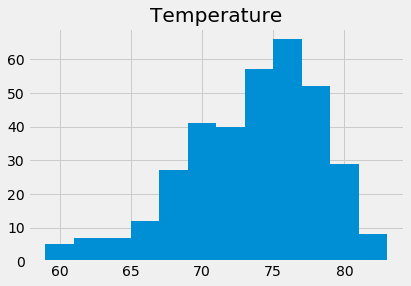

In [104]:
df_station.hist(column='Temperature', bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
